In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import cv2 
import random
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [2]:
directory = "B:\\major_project_2\\cancer_classification"

In [3]:
categories = ["Cancer","Not_Cancer"]

In [4]:
data = []

In [5]:
for category in categories:
    path = os.path.join(directory,category)
    label = categories.index(category)
    for img in os.listdir(path):
        img_path = os.path.join(path,img)
        ct_img = cv2.imread(img_path,0)
        ct_img = cv2.resize(ct_img,(32,32))
        image = np.array(ct_img).flatten()
        
        data.append([image,label])
        

In [21]:
len(data)

1186

In [22]:
random.shuffle(data)

In [23]:
features = []
labels = []
for feature, label in data:
    features.append(feature)
    labels.append(label)

In [24]:
x_train , x_test ,y_train , y_test = train_test_split(features,labels,test_size = 0.2 )

In [25]:
model = SVC(C=1 , kernel="poly" ,gamma = "auto")

In [26]:
model.fit(x_train,y_train)

SVC(C=1, gamma='auto', kernel='poly')

In [27]:
prediction = model.predict(x_test)

In [28]:
acc = model.score(x_test,y_test)

In [29]:
acc


0.8571428571428571

In [30]:
#import pickle
#file_name = "svm_cancer.sav"
#pickle.dump(model, open(file_name, 'wb'))

In [31]:
from sklearn.metrics import confusion_matrix
confusion_arr = confusion_matrix(y_test, prediction)

In [32]:
confusion_arr

array([[127,  18],
       [ 16,  77]], dtype=int64)

In [33]:
np.set_printoptions(precision=3)

In [34]:
from sklearn.metrics import plot_confusion_matrix


[[127  18]
 [ 16  77]]


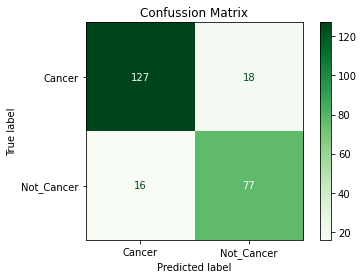

In [35]:
disp = plot_confusion_matrix(model, x_test, y_test,
                                 display_labels=categories,
                                 cmap=plt.cm.Greens)
disp.ax_.set_title("Confussion Matrix")

print()
print(disp.confusion_matrix)

In [37]:
precison = 127/(127+18)

In [38]:
recall = 127 / (127+16)

In [39]:
recall

0.8881118881118881

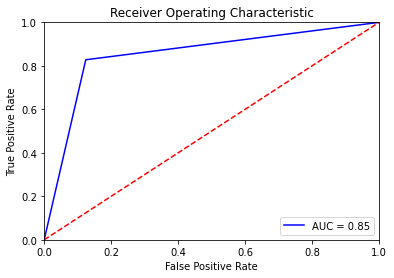

In [41]:
import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(y_test, prediction)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [42]:
metrics.roc_auc_score(y_test,prediction)


0.8519095291064146

In [43]:
metrics.auc(fpr, tpr)

0.8519095291064146